In [1]:
# %matplotlib inline
import numpy as np
import torch
import math


In [74]:
def gd(eta):
    x = 10
    results = [x]
    for i in range(10):
        x -= eta * 2 * x
        results.append(x)
    return results

result = gd(0.2)

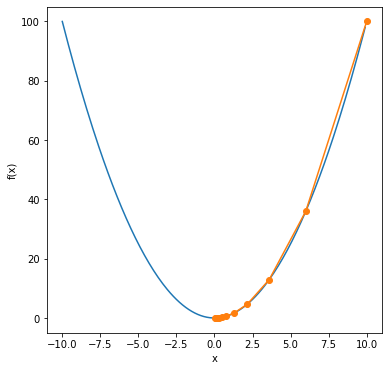

In [75]:
import matplotlib.pyplot as plt

def show_trace(result):
    n = max(abs(min(result)), abs(max(result)), 10)
    f_line = np.arange(-n, n, 0.1)
    plt.rcParams['figure.figsize'] = (6, 6)
    plt.plot(f_line, [x * x for x in f_line])
    plt.plot(result, [x * x for x in result], '-o')
    plt.xlabel('x')
    plt.ylabel('f(x)')
show_trace(result)

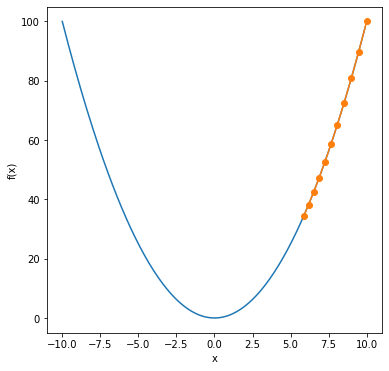

In [76]:
show_trace(gd(0.026))

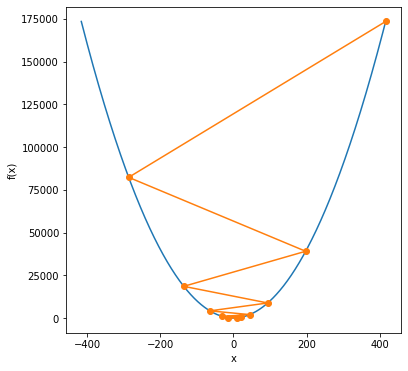

In [77]:
show_trace(gd(1.226))

### 多维梯度下降

In [82]:
def train_2d(gd):
    x1, x2, s1, s2 = -5, -2, 0, 0
    results = [(x1,x2)]
    for i in range(20):
        x1, x2, s1, s2 = gd(x1, x2, s1, s2)
        results.append((x1,x2))
    print('epoch: {}, x1: {:.4f}, x2: {:.4f}'.format(i+1, x1, x2))
    return results

def show_trace_2d(f, results):
    plt.plot(*zip(*results), '-o', color='#ff7f0e')
    x1, x2 = np.meshgrid(np.arange(-5.5, 1.0, 0.1), np.arange(-3.0, 1.0, 0.1))
    plt.contour(x1,x2,f(x1,x2),colors='#1f77b4')
    plt.xlabel('x1')
    plt.ylabel('x2')

epoch: 20, x1: -0.0576, x2: -0.0001


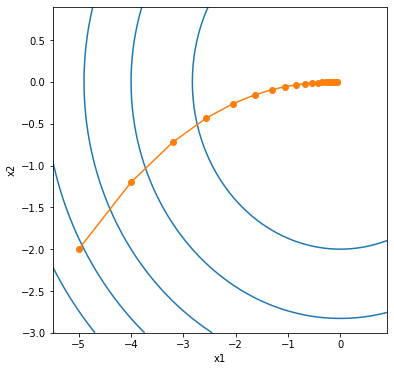

In [83]:
eta = 0.1

def f_2d(x1, x2):  # 目标函数
    return x1 ** 2 + 2 * x2 ** 2

def gd_2d(x1, x2, s1, s2):
    return (x1 - eta * 2 * x1, x2 - eta * 4 * x2, 0, 0)

show_trace_2d(f_2d, train_2d(gd_2d))


epoch: 20, x1: -0.5163, x2: 0.0069


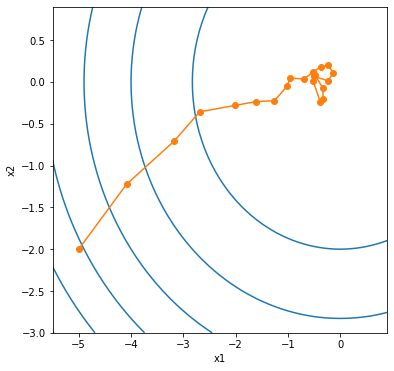

In [84]:
def sgd_2d(x1, x2, s1, s2):
    return (x1 - eta * (2 * x1 + np.random.normal(0.1)),
            x2 - eta * (4 * x2 + np.random.normal(0.1)), 0, 0)

show_trace_2d(f_2d, train_2d(sgd_2d))
